# Mod 3 CRISP-DM Lab

## Objectives

By the end of this lab you will be able to:
- Understand the steps of the CRISP-DM model
- Apply the steps of the CRISP-DM model to a business problem using mod 3 skillsets

## CRoss-Industry Standard Process for Data Mining (CRISP-DM)

Before we dig into the problem, lets refresh our memories on the steps in the CRISP-DM model.

<img src="img/new_crisp-dm.png" width="500">

### The Data

<img src="img/grocery-cart.jpg" width="500">

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.

The data is located in the csv called `big_mart.csv`

### Step 1: Business Understanding

We previously explored the features of the big_mart dataset but now BigMart wants us to answer the following question:

**The sales team at BigMart wants to know which products have high sales.  They ask you to help them  predict if sales of each product at a particular store will be high or low using the big_mart dataset.**


### Step 2: Data Understanding

We have already done a great deal of exploratory data analysis of this dataset.  Let's refresh out memory on what the original data contained. 

<img src="img/big_mart_data_variables.png" width="500">

### Step 3: Data Preparation

This step has already been done for you.  The following steps were taken and are reflected in the `big_mart_clean.csv` file.

- Imputed missing values for `Outlet_Size` (replaced missing with the mode)
- Imputed missing values for `Item_Weight` (replaced missing with the average)
- Created a dichotomous variable `Item_Sales_Cat` for high vs low sales (low sales are defined as less than 2000)
- Cleaned typos in `Item_Fat_Content`
- Created new variable `Item_Type_Combined` (labels items as food, non-consumable, or drinks)
- Created new variable `Outlet_Years` (the years of operation of a store)


#### Before we begin modeling let's do a quick exploration of out new dataset!

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#explore the dataset
big_mart = pd.read_csv('big_mart_clean.csv')


In [3]:
big_mart.shape

(8523, 13)

In [5]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           8523 non-null   object 
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Sales_Cat        8523 non-null   object 
 11  Item_Type_Combined    8523 non-null   object 
 12  Outlet_Years          8523 non-null   int64  
dtypes: float64(3), int64(1), object(9)
memory usage: 865.7+ KB


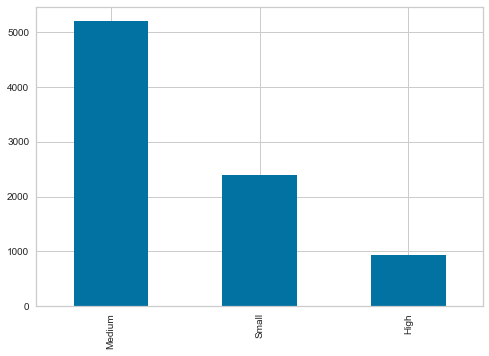

In [10]:
big_mart.Outlet_Size.value_counts().plot(kind='bar')

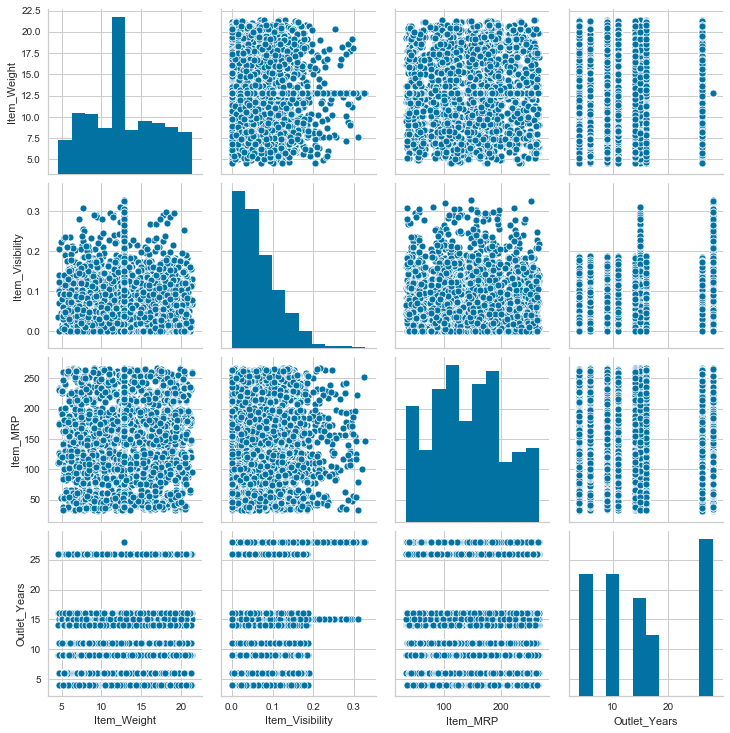

In [8]:
sns.pairplot(big_mart)

In [11]:
big_mart.Item_Identifier.value_counts()

FDG33    10
FDW13    10
DRE49     9
FDV60     9
FDQ40     9
         ..
FDK57     1
FDO33     1
DRF48     1
FDE52     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
#let's look at the target variable (Item_Sales_Cat) a little more in depth to examine the classes



### Step 4: Modeling

Once we have clean data, we can begin modeling! Remember, modeling, as with any of these other steps, is an iterative process. During this stage, we'll try to build and tune models to get the highest performance possible on our task.

Consider the following questions during the modeling step:

- Is this a classification task? A regression task? Something else?
- What models will we try?
- How do we deal with overfitting?
- Do we need to use regularization or not?
- What sort of validation strategy will we be using to check that our model works well on unseen data?
- What loss functions will we use?
- What threshold of performance do we consider as successful?



<img src="img/talking.jpeg" width="60" align='left'>

#### Turn and Talk

How would we answer these modeling questions in order to answer the business question we established above?

#### Data preparation

Before we begin modeling let's split our data and then perform encoding/scaling steps.

In [12]:
#set random state for our notebook
import numpy as np
np.random.seed(217)

y = big_mart['Item_Sales_Cat']
X = big_mart.drop(columns=['Item_Sales_Cat', 'Item_Identifier'])

#split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)


In [13]:
#get shape of the training and test sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6392, 11), (6392,), (2131, 11), (2131,))

In [14]:
y_train

6516     low
3352    high
1688     low
2068    high
4720     low
        ... 
6240    high
2989    high
4438    high
572     high
4754     low
Name: Item_Sales_Cat, Length: 6392, dtype: object

In [18]:
### Add code here
numeric_features = ['Item_Weight', 'Item_Visibility',
                     'Item_MRP', 'Outlet_Years']
ss=StandardScaler()

categorical_features = [ 'Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_Combined' ]

categorical_transformer = Pipeline(steps=[
    ("ordinal", OrdinalEncoder()),
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', ss, numeric_features),
        ('cat', categorical_transformer, categorical_features)], remainder='passthrough')

#let's use it now!

X_train_tran = preprocessor.fit_transform(X_train)
X_train_tran

#and we can transform X_test too

X_test_tran = preprocessor.fit_transform(X_test)
X_test_tran

<2131x46 sparse matrix of type '<class 'numpy.float64'>'
	with 23441 stored elements in Compressed Sparse Row format>

In [19]:
#get column names for categories
cat_names = preprocessor.named_transformers_['cat'].named_steps['ordinal'].categories_

cat_names = [val for sublist in cat_names for val in sublist]
cat_names

#full list of column names
column_names = numeric_features + cat_names

#apply column names to dataframe
X_train_trans = pd.DataFrame.sparse.from_spmatrix(X_train_tran, columns=column_names)
X_train_trans.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Low Fat,Non-Edible,Regular,Baking Goods,Breads,Breakfast,...,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Drinks,Food,Non-Consumable
0,-1.036915,-0.972700,0.824790,-1.341284,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.378661,-0.223000,-0.764420,-0.148401,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.011160,1.071408,-1.309291,1.521635,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.933487,-0.723034,0.085657,1.283059,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.895380,-0.073697,-1.289446,-1.341284,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Dummy Model

First we are going to start with a dummy model to predict if the product has high or low sales. In our dummy model we classify everything as the majority class.
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

In [20]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train_tran, y_train)
dummy.score(X_test_tran, y_test)

0.5391834819333646

<img src="img/talking.jpeg" width="60" align='left'>

#### Turn and Talk

What does the score from this model tell us?

Now that we have run our dummy model let's create a nice looking confusion matrix using the [yellowbrick package](https://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html)

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


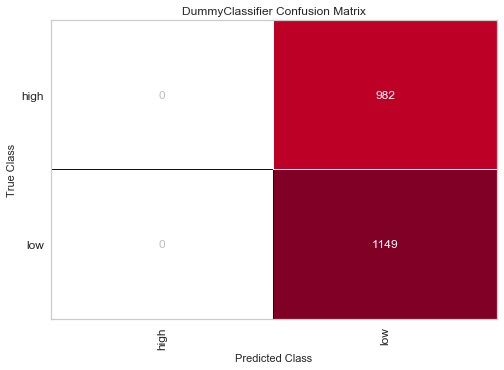

              precision    recall  f1-score   support

        high       0.00      0.00      0.00       982
         low       0.54      1.00      0.70      1149

    accuracy                           0.54      2131
   macro avg       0.27      0.50      0.35      2131
weighted avg       0.29      0.54      0.38      2131



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
cm = ConfusionMatrix(dummy)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_tran, y_test)

# How did we do?
cm.poof()

#specify the target classes
#classes = ["unoccupied", "occupied"]

# Instantiate the classification model and visualizer
y_pred=dummy.predict(X_test_tran)
print(classification_report(y_test, y_pred))

#### "Vanilla" Logistic Regression Model

Now that we know what our dummy/baseline classifier does let's fit a "vanilla" (aka, with all the defaults) Logistic Regression Model.

In [31]:
#your code here
log_reg = LogisticRegression(solver='liblinear', penalty='l1')
log_reg.fit(X_train_tran, y_train)
log_reg.score(X_train_tran, y_train)

0.809136420525657

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


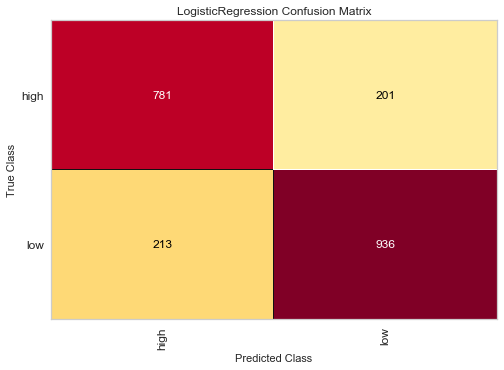

              precision    recall  f1-score   support

        high       0.79      0.80      0.79       982
         low       0.82      0.81      0.82      1149

    accuracy                           0.81      2131
   macro avg       0.80      0.80      0.80      2131
weighted avg       0.81      0.81      0.81      2131



In [24]:
cm = ConfusionMatrix(log_reg)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_tran, y_test)

# How did we do?
cm.poof()

#specify the target classes
#classes = ["unoccupied", "occupied"]

# Instantiate the classification model and visualizer
y_pred=log_reg.predict(X_test_tran)
print(classification_report(y_test, y_pred))

#### "Vanilla" KNN Model

OK, now we know how the Logistic Regression model works, but maybe there is a model that does even better.  Let's try a KNN Model next.

In [27]:
#your code here
knn =KNeighborsClassifier()
knn.fit(X_train_tran, y_train)
knn.score(X_test_tran, y_test)

0.7611450023463163

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


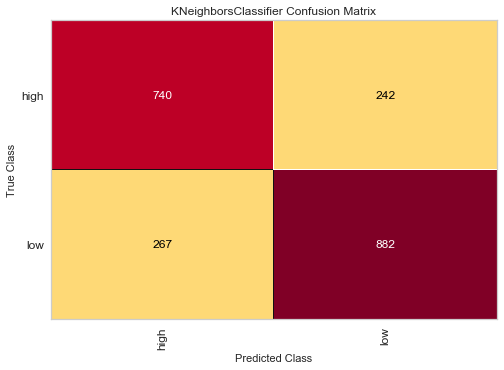

              precision    recall  f1-score   support

        high       0.73      0.75      0.74       982
         low       0.78      0.77      0.78      1149

    accuracy                           0.76      2131
   macro avg       0.76      0.76      0.76      2131
weighted avg       0.76      0.76      0.76      2131



In [30]:
cm = ConfusionMatrix(knn)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_tran, y_test)

# How did we do?
cm.poof()

#specify the target classes
#classes = ["unoccupied", "occupied"]

# Instantiate the classification model and visualizer
y_pred=knn.predict(X_test_tran)
print(classification_report(y_test, y_pred))

### Step 5: Evalution

During the evaluation step we want to evaluate the results of our models, and decide the next steps in selecting the "best" model.  During this step we should consider the following:

- Does our model solve the business problem?
- What metrics should we be using to evaluate the "success" of our model?
- Can we further improve our models?
- Do we need more data?  Or different data?

<img src="img/talking.jpeg" width="60" align='left'>

#### Turn and Talk

What model do you think is "best" and why?